# CSCI 4155 Machine Learning - Group Project

---
Group 13:
- [Corentin Goetghebeur](cr453043@dal.ca) - B00945496
- [Gabriel Marchand](gb614643@dal.ca) - B00929349
- [Rinchen Toh](rn835427@dal.ca) - B00944448
---

This notebook is part of a group project taking place during the fall semester of 2022 in the CSCI 4155 Machine Learning class in Dalhousie University (NS, Canada).

This project aims to compare different machine learning algorithms to detect network intrusions using the KDD Cup'99 dataset.

---

This notebook contains the classification using Logistic Regression.

# Logistic Regression

In [ ]:
# Importing libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Loading Datasets

In [ ]:
# loading datasets
X_train = pd.read_csv("kdd99_training_data.csv")
X_test = pd.read_csv("kdd99_testing_data.csv")
y_train = pd.read_csv("kdd99_training_labels.csv")['label']
y_test = pd.read_csv("kdd99_testing_labels.csv")['label']

print(f"Shape of training dataset: {X_train.shape}")
print(f"Shape of testing dataset: {X_test.shape}")
print(f"Shape of training labels: {y_train.shape}")
print(f"Shape of testing labels: {y_test.shape}")

Shape of training dataset: (370515, 32)
Shape of testing dataset: (123505, 32)
Shape of training labels: (370515,)
Shape of testing labels: (123505,)


In [ ]:
# loading sampled
#X_train_sampled = pd.read_csv("sampled_kdd99_training_data.csv")
#X_test_sampled = pd.read_csv("sampled_kdd99_testing_data.csv")
#y_train_sampled = pd.read_csv("sampled_kdd99_training_labels.csv")['label']
#y_test_sampled = pd.read_csv("sampled_kdd99_testing_labels.csv")['label']

## Scaling

In [ ]:
# scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Model Training

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1_200_000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1200000)

Now, we can predict using the testing data.

In [ ]:
y_predicted = model.predict(X_test)

print(f"Prediction score on the training data: {model.score(X_train, y_train)}")
print(f"Prediction score on the testing data: {model.score(X_test, y_test)}")

Prediction score on the training data: 0.9928963739659663
Prediction score on the testing data: 0.9928909760738431


## Model Evaluation

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

conf_matrix = confusion_matrix(y_test, y_predicted)
report = classification_report(y_test, y_predicted)

print(report)

              precision    recall  f1-score   support

         dos       1.00      0.99      1.00     97676
      normal       0.97      1.00      0.98     24482
       probe       0.96      0.91      0.93      1056
         r2l       0.81      0.56      0.66       279
         u2r       1.00      0.33      0.50        12

    accuracy                           0.99    123505
   macro avg       0.95      0.76      0.82    123505
weighted avg       0.99      0.99      0.99    123505



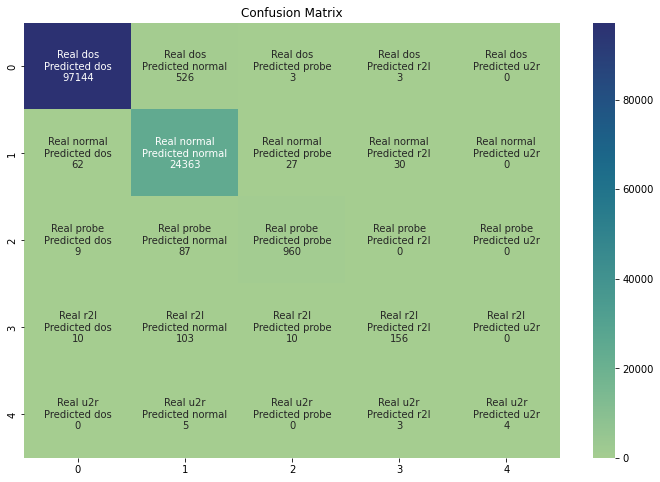

In [ ]:
# building annotations
y_labels = ['dos', 'normal', 'probe', 'r2l', 'u2r']
labels = []
for i in range(5):
  for j in range(5):
    labels.append(str(f"Real {y_labels[i]}\nPredicted {y_labels[j]}\n{conf_matrix[i, j]}"))

labels = np.asarray(labels).reshape(5, 5)


# confusion matrix visualization

plt.figure(figsize=(12, 8))
plt.title("Confusion Matrix")
sns.heatmap(conf_matrix, annot=labels, cmap='crest', fmt='')
plt.show()

## Conclusion

The global performance for this algorithm is very good:
- accuracy: 0.99
- precision weighted average 0.99
- recall weighted average: 0.99
- f1-score weighted average: 0.99

However, it has a low recall on the R2L label (56%) and a very low recall on the U2R label (33%).